In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/Home/OneDrive/Desktop/data project//modified_data.csv')
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,67,11,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,70,10,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,59,10,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,40,10,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,43,10,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,57,11,1341
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,78,10,444
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,43,10,1241
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,68,10,843


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Assuming df is your DataFrame

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables
ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(df[categorical_cols])

# Convert the encoded data to a dense array
encoded_data = encoded_data.toarray()

# Create a new DataFrame with the encoded categorical variables
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))

# Concatenate the encoded categorical variables with the numerical variables
df = pd.concat([df[numerical_cols], encoded_df], axis=1)

# Scale numerical variables
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(df.iloc[:,1:])
X_scaled

array([[-0.82521765, -0.92989438,  0.30703926, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [ 1.03255877,  0.90693402, -0.38366418, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-0.82521765, -0.92989438, -0.79808624, ...,  1.69176504,
        -0.18867619, -0.02989406],
       ...,
       [-0.82521765, -0.92989438,  1.44669994, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-0.82521765,  0.90693402, -1.41971934, ...,  1.69176504,
        -0.18867619, -0.02989406],
       [ 1.03255877,  0.90693402, -0.31459383, ..., -0.59109863,
        -0.18867619, -0.02989406]])

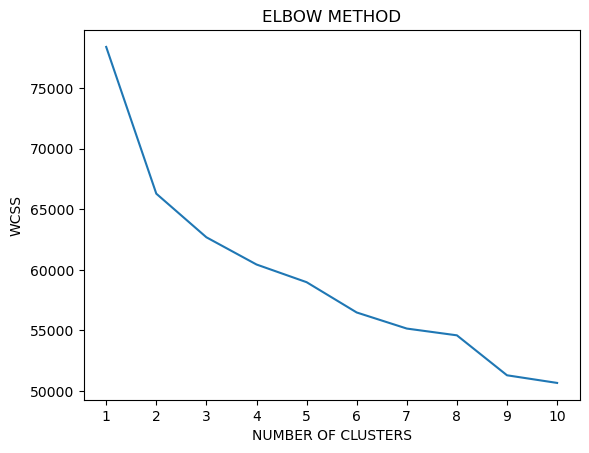

In [5]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# plot the elbow method
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.show()

In [6]:
wcss

[78399.99999999994,
 66289.63046279197,
 62689.34566378272,
 60443.88403522678,
 58983.97404413149,
 56483.96910978544,
 55156.4597320149,
 54597.99449370323,
 51300.614359607964,
 50670.379665528904]

In [7]:
# lets do with K=2 value
from sklearn.cluster import KMeans
clusters = KMeans(2,random_state=0)
clusters.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [8]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X_scaled)

In [9]:
predict

array([0, 1, 0, ..., 0, 0, 1])

In [10]:
df['cluster_num']=kmeans.labels_

In [11]:
df.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster_num
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [12]:
df[df['cluster_num']==1].head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster_num
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
7,-0.750763,1.032559,-0.929894,-0.590875,-0.677327,-0.409969,-0.491658,-0.632140,-0.631503,-0.403059,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
8,-0.874723,1.032559,-0.929894,-1.039832,-0.861565,-0.661449,-0.633461,-0.632140,-0.583043,-0.805699,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [13]:
df[df['cluster_num']==0].head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster_num
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,0.410102,-0.825218,0.906934,-1.143438,0.642051,0.394768,-0.305541,-0.687068,0.361924,-0.575619,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,0.135336,-0.825218,0.906934,-0.521805,-0.204847,0.973172,-0.013072,0.228401,0.531533,-0.326366,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
12,0.430875,-0.825218,-0.929894,1.135883,-0.326682,0.872580,1.387233,3.432545,2.058018,-0.268846,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
df.groupby('cluster_num').agg(['mean']).reset_index()

,cluster_num,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.760591,-0.701645,-0.149191,0.028694,0.910249,0.748343,0.875665,0.776176,0.751378,...,0.148816,0.233371,0.002255,0.000000,0.114994,0.368658,0.214205,0.255919,0.043968,0.000000
1,1,-0.498629,0.459985,0.097806,-0.018811,-0.596741,-0.490599,-0.574069,-0.508846,-0.492589,...,0.175905,0.206208,0.000000,0.002217,0.096083,0.396896,0.214339,0.260902,0.028086,0.001478


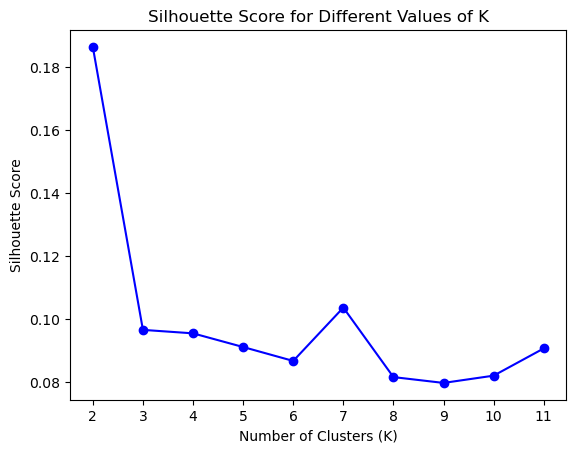

In [15]:
#SILHOUETTE SCORE:-
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Renamed to avoid conflict

K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Added random_state for reproducibility
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.show()


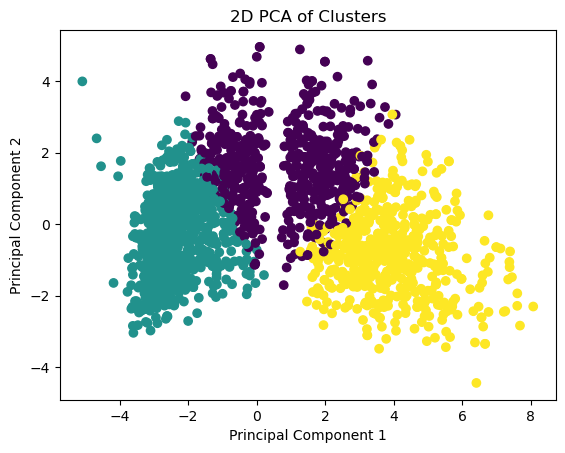

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric data
X_scaled = scaler.fit_transform(numeric_df)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Use PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Clusters')
plt.show()


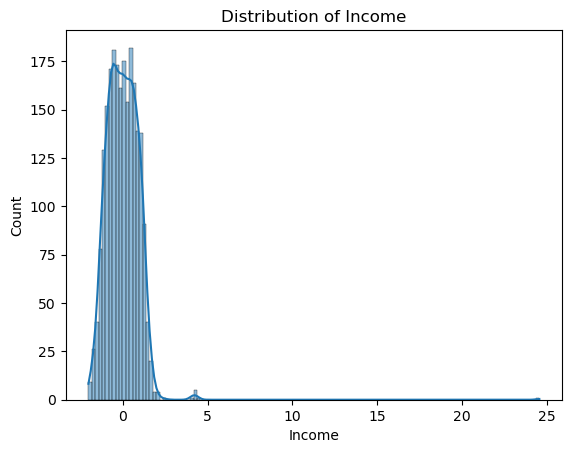

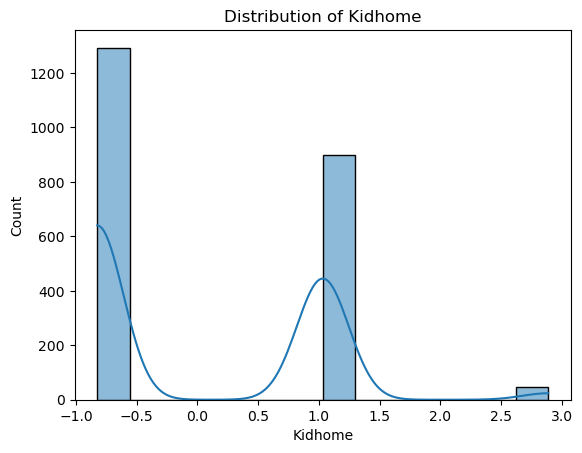

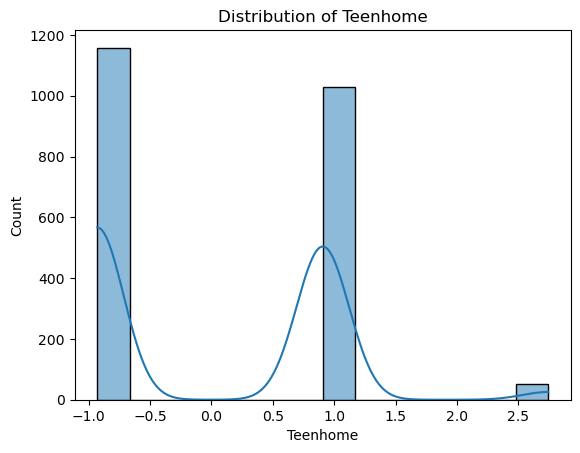

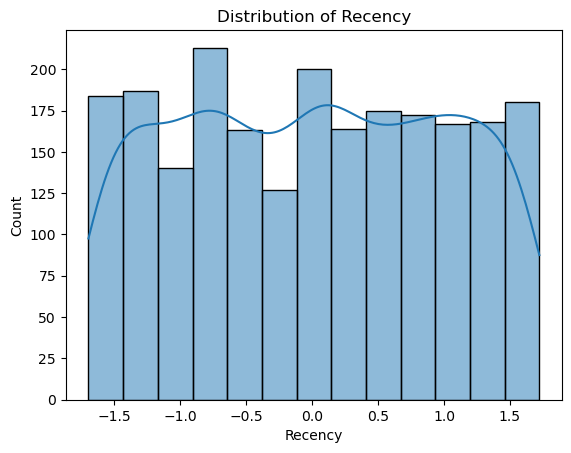

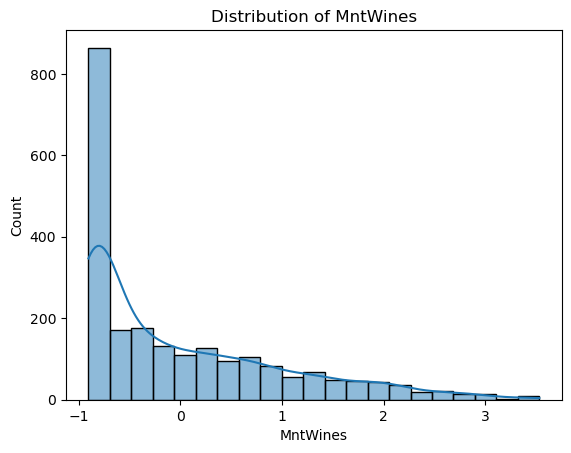

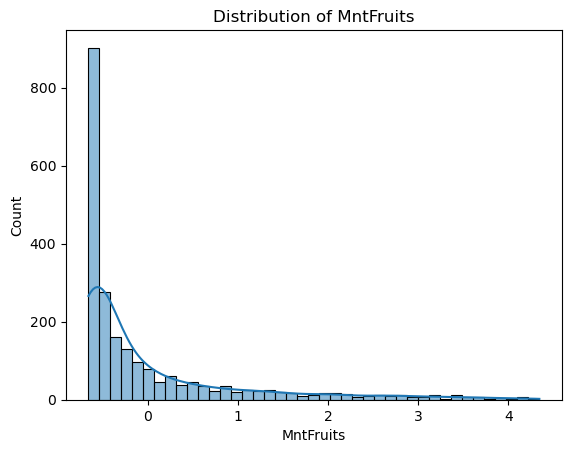

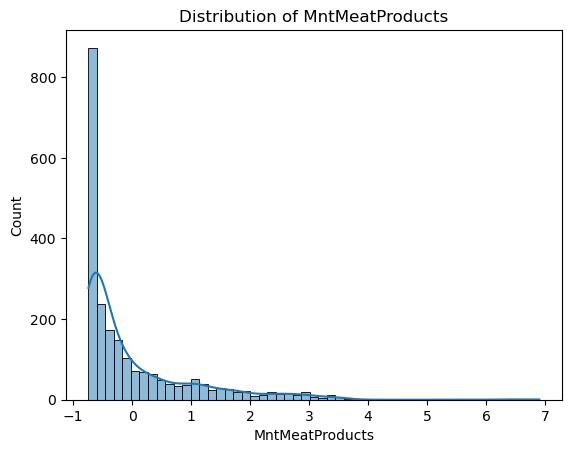

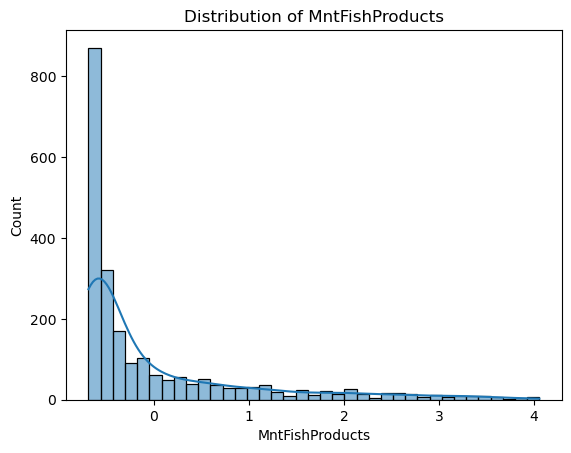

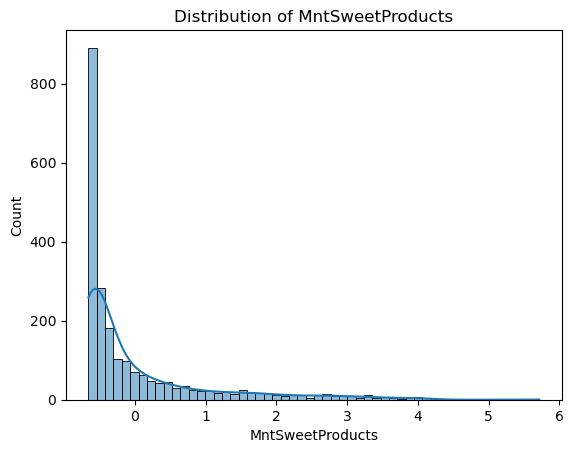

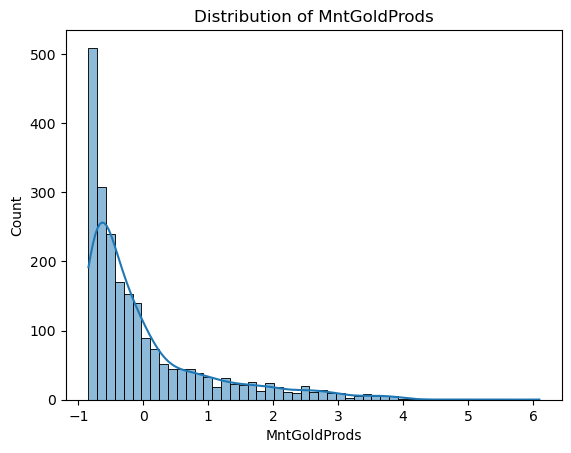

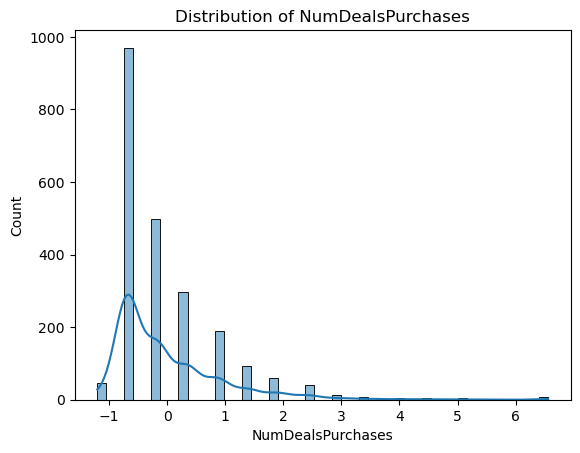

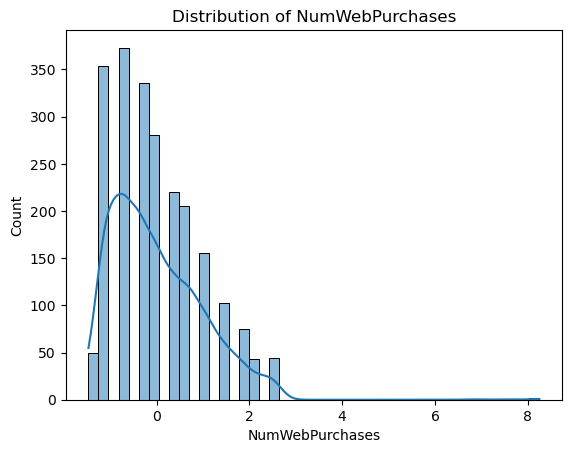

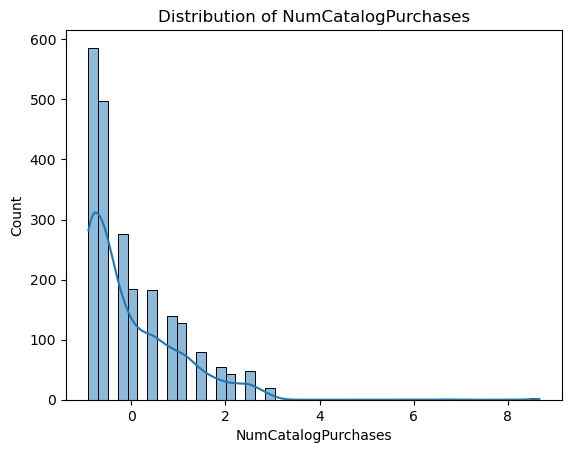

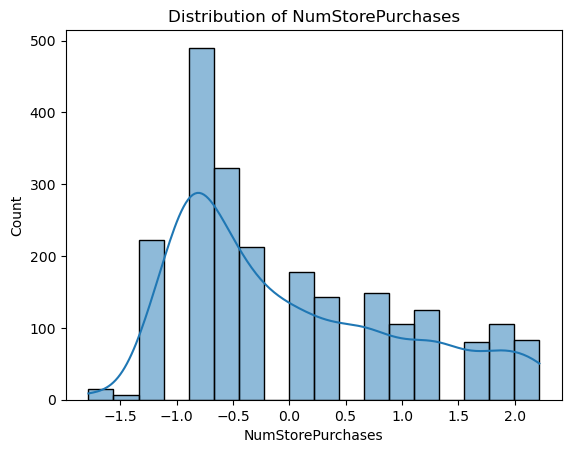

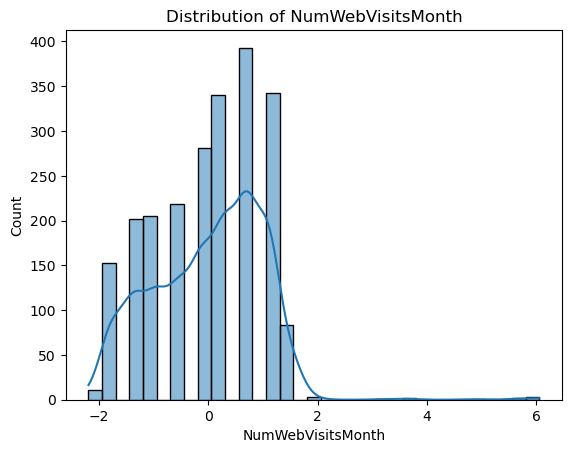

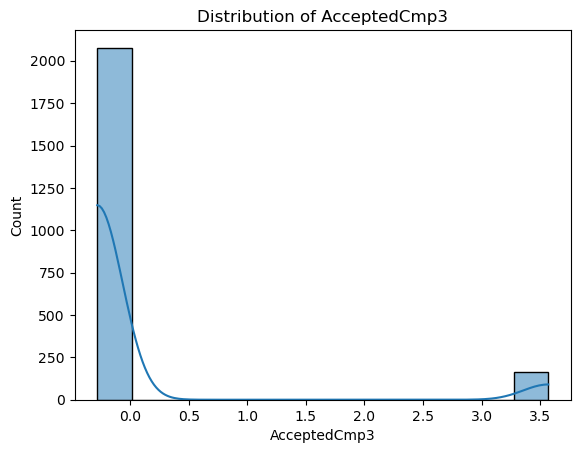

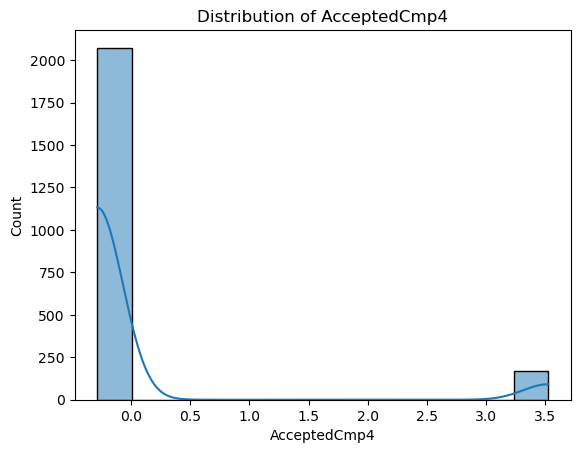

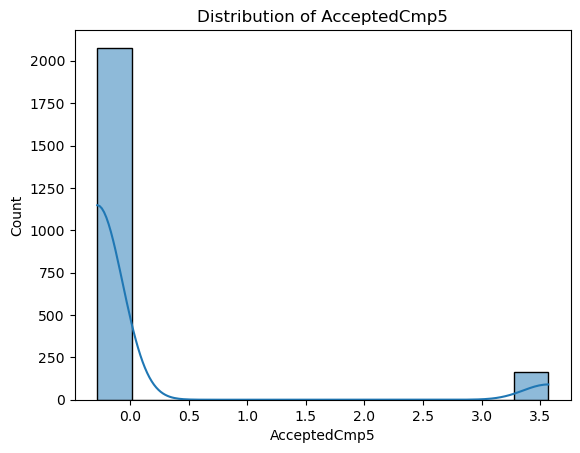

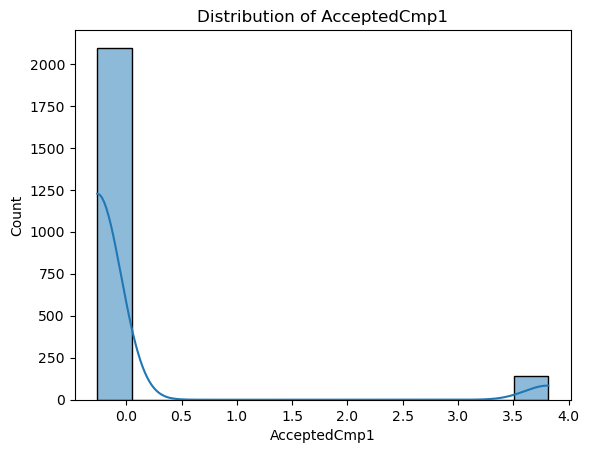

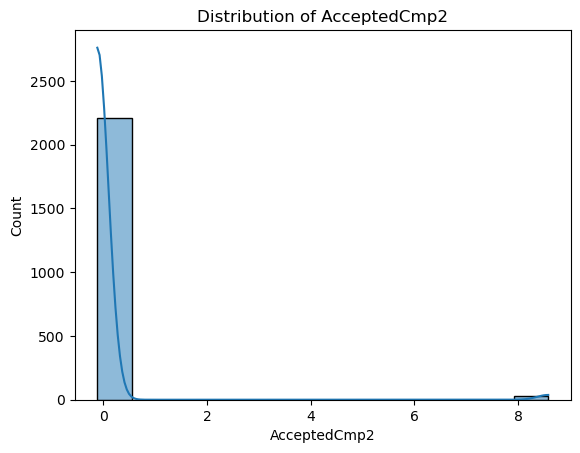

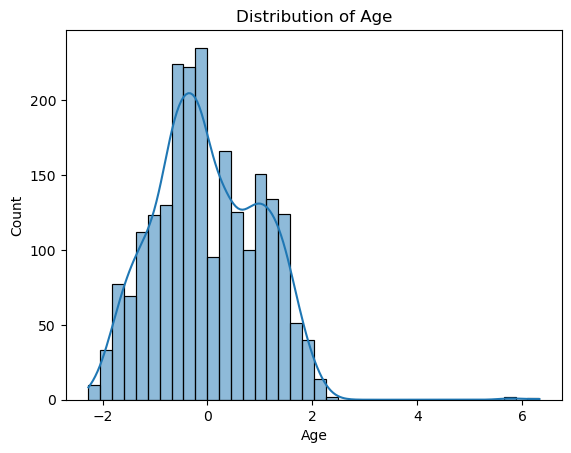

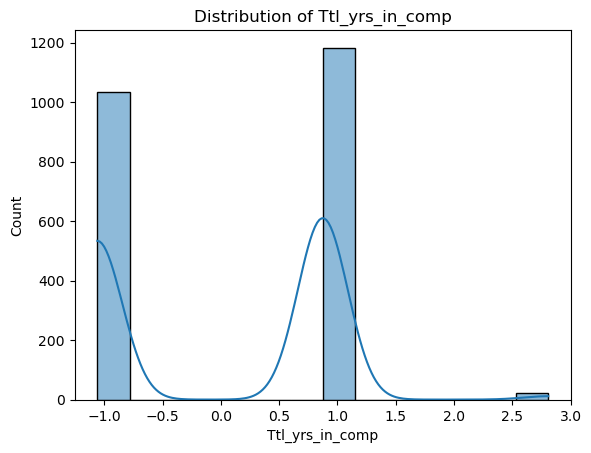

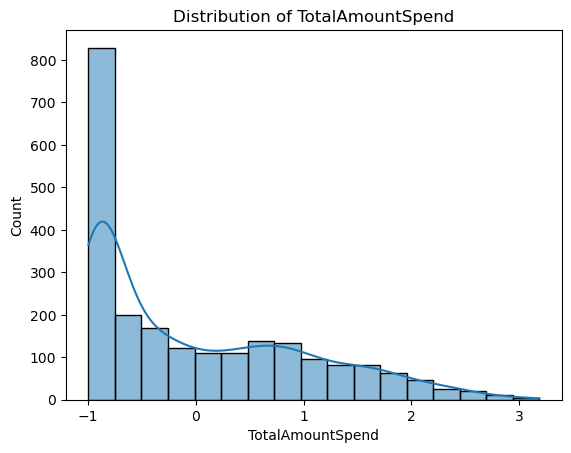

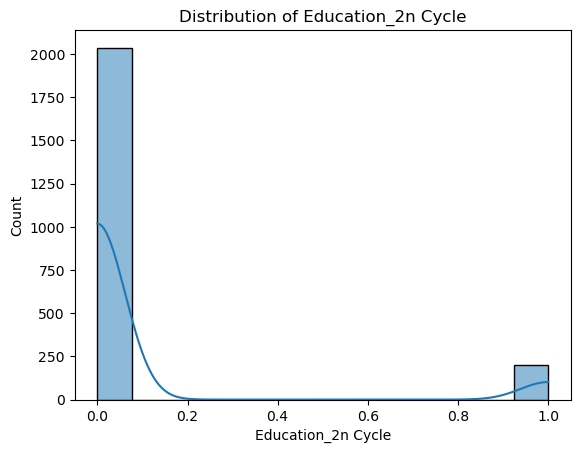

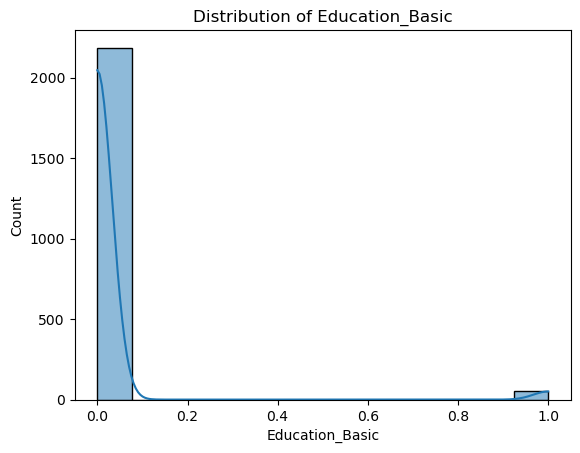

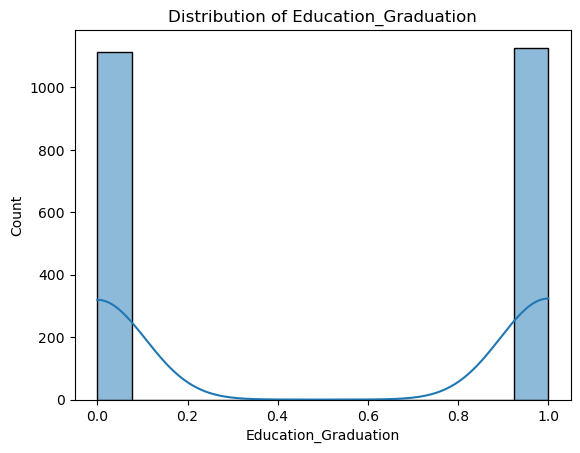

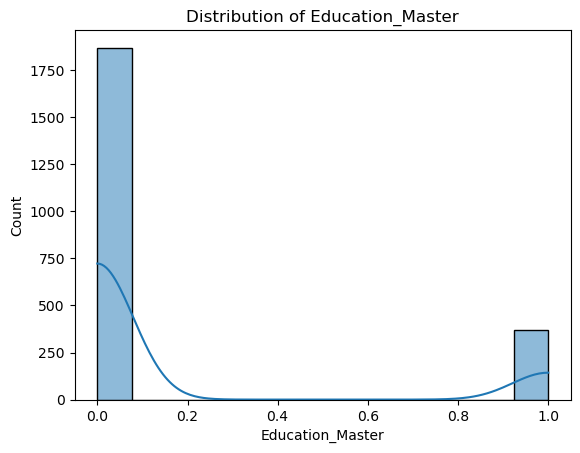

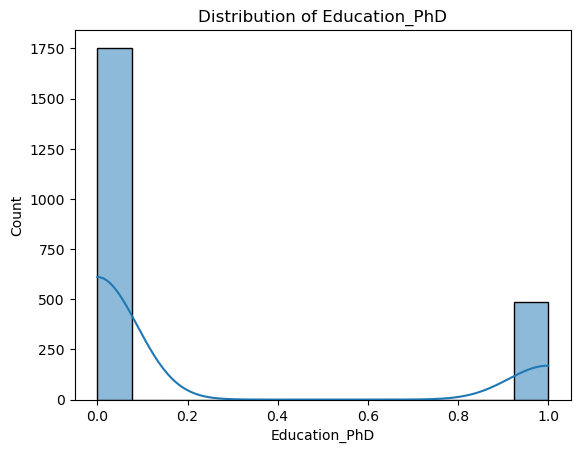

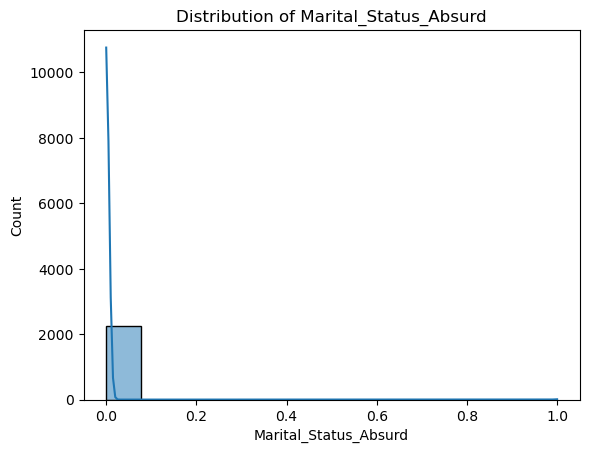

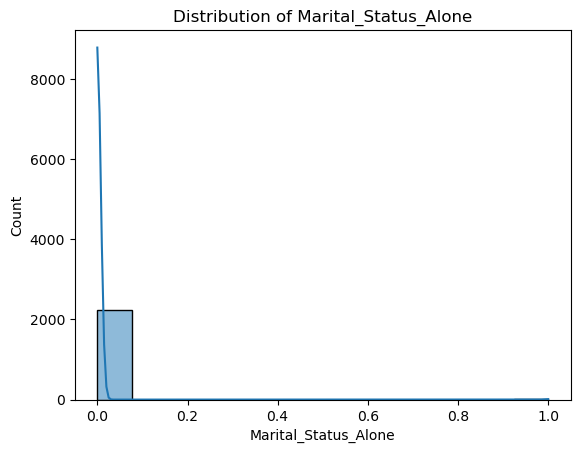

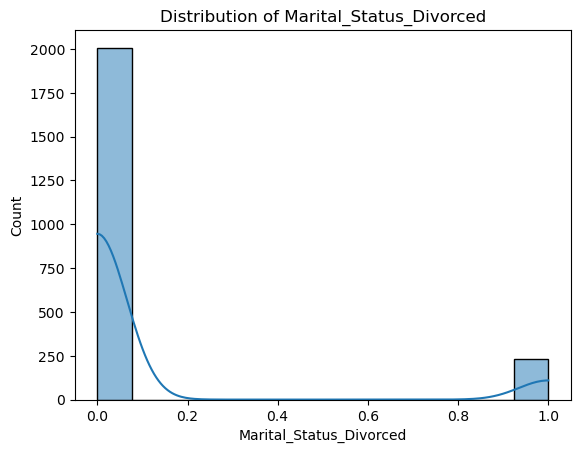

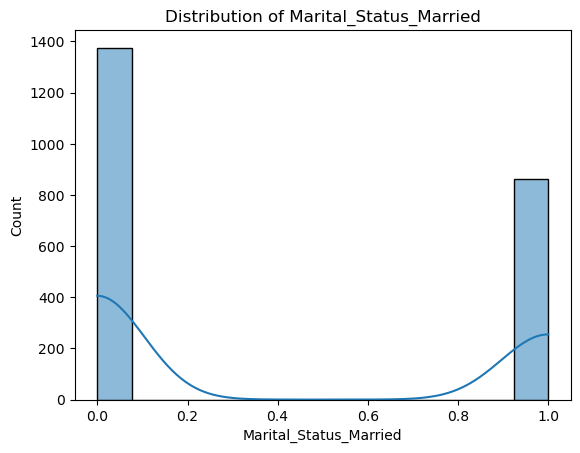

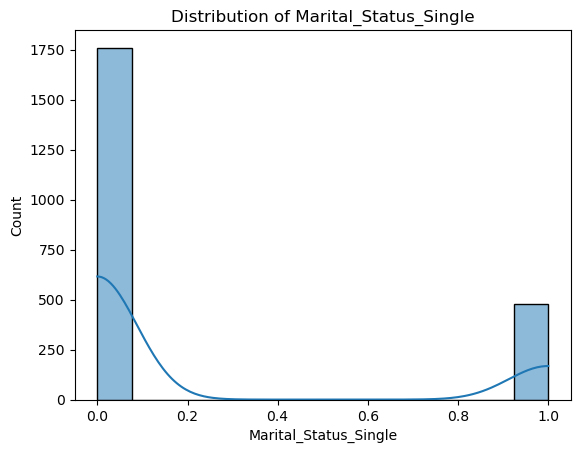

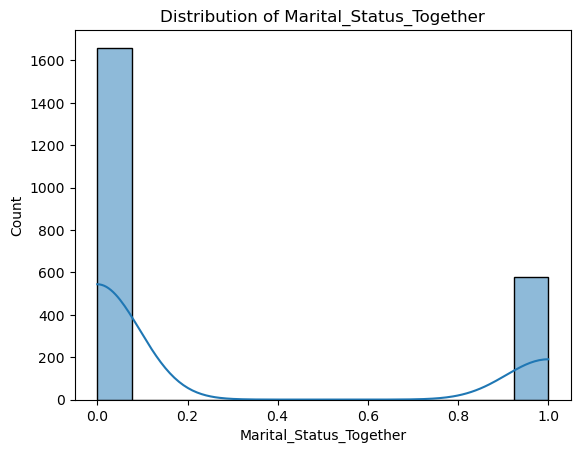

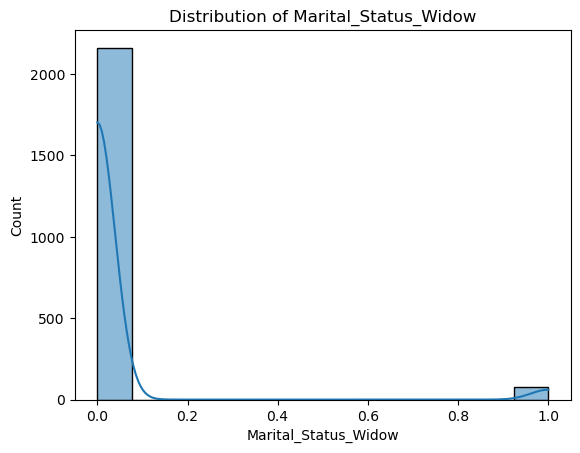

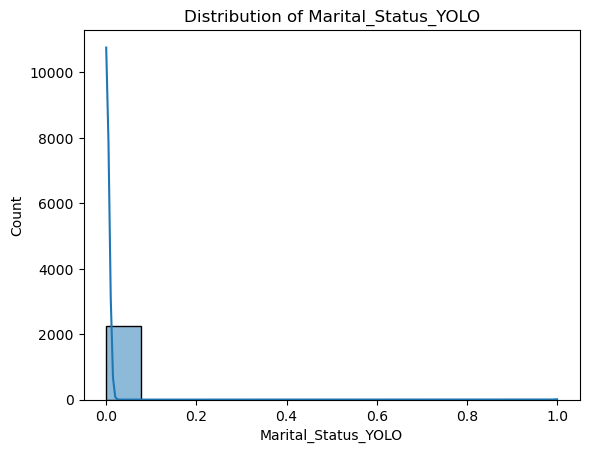

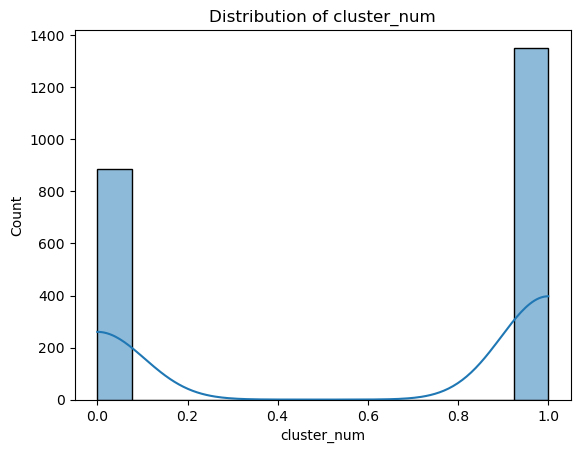

In [17]:
for column in df.columns:
    plt.figure()
    sns.histplot(df[column], kde=True)  # seaborn.distplot is deprecated
    plt.title(f'Distribution of {column}')
    plt.show()

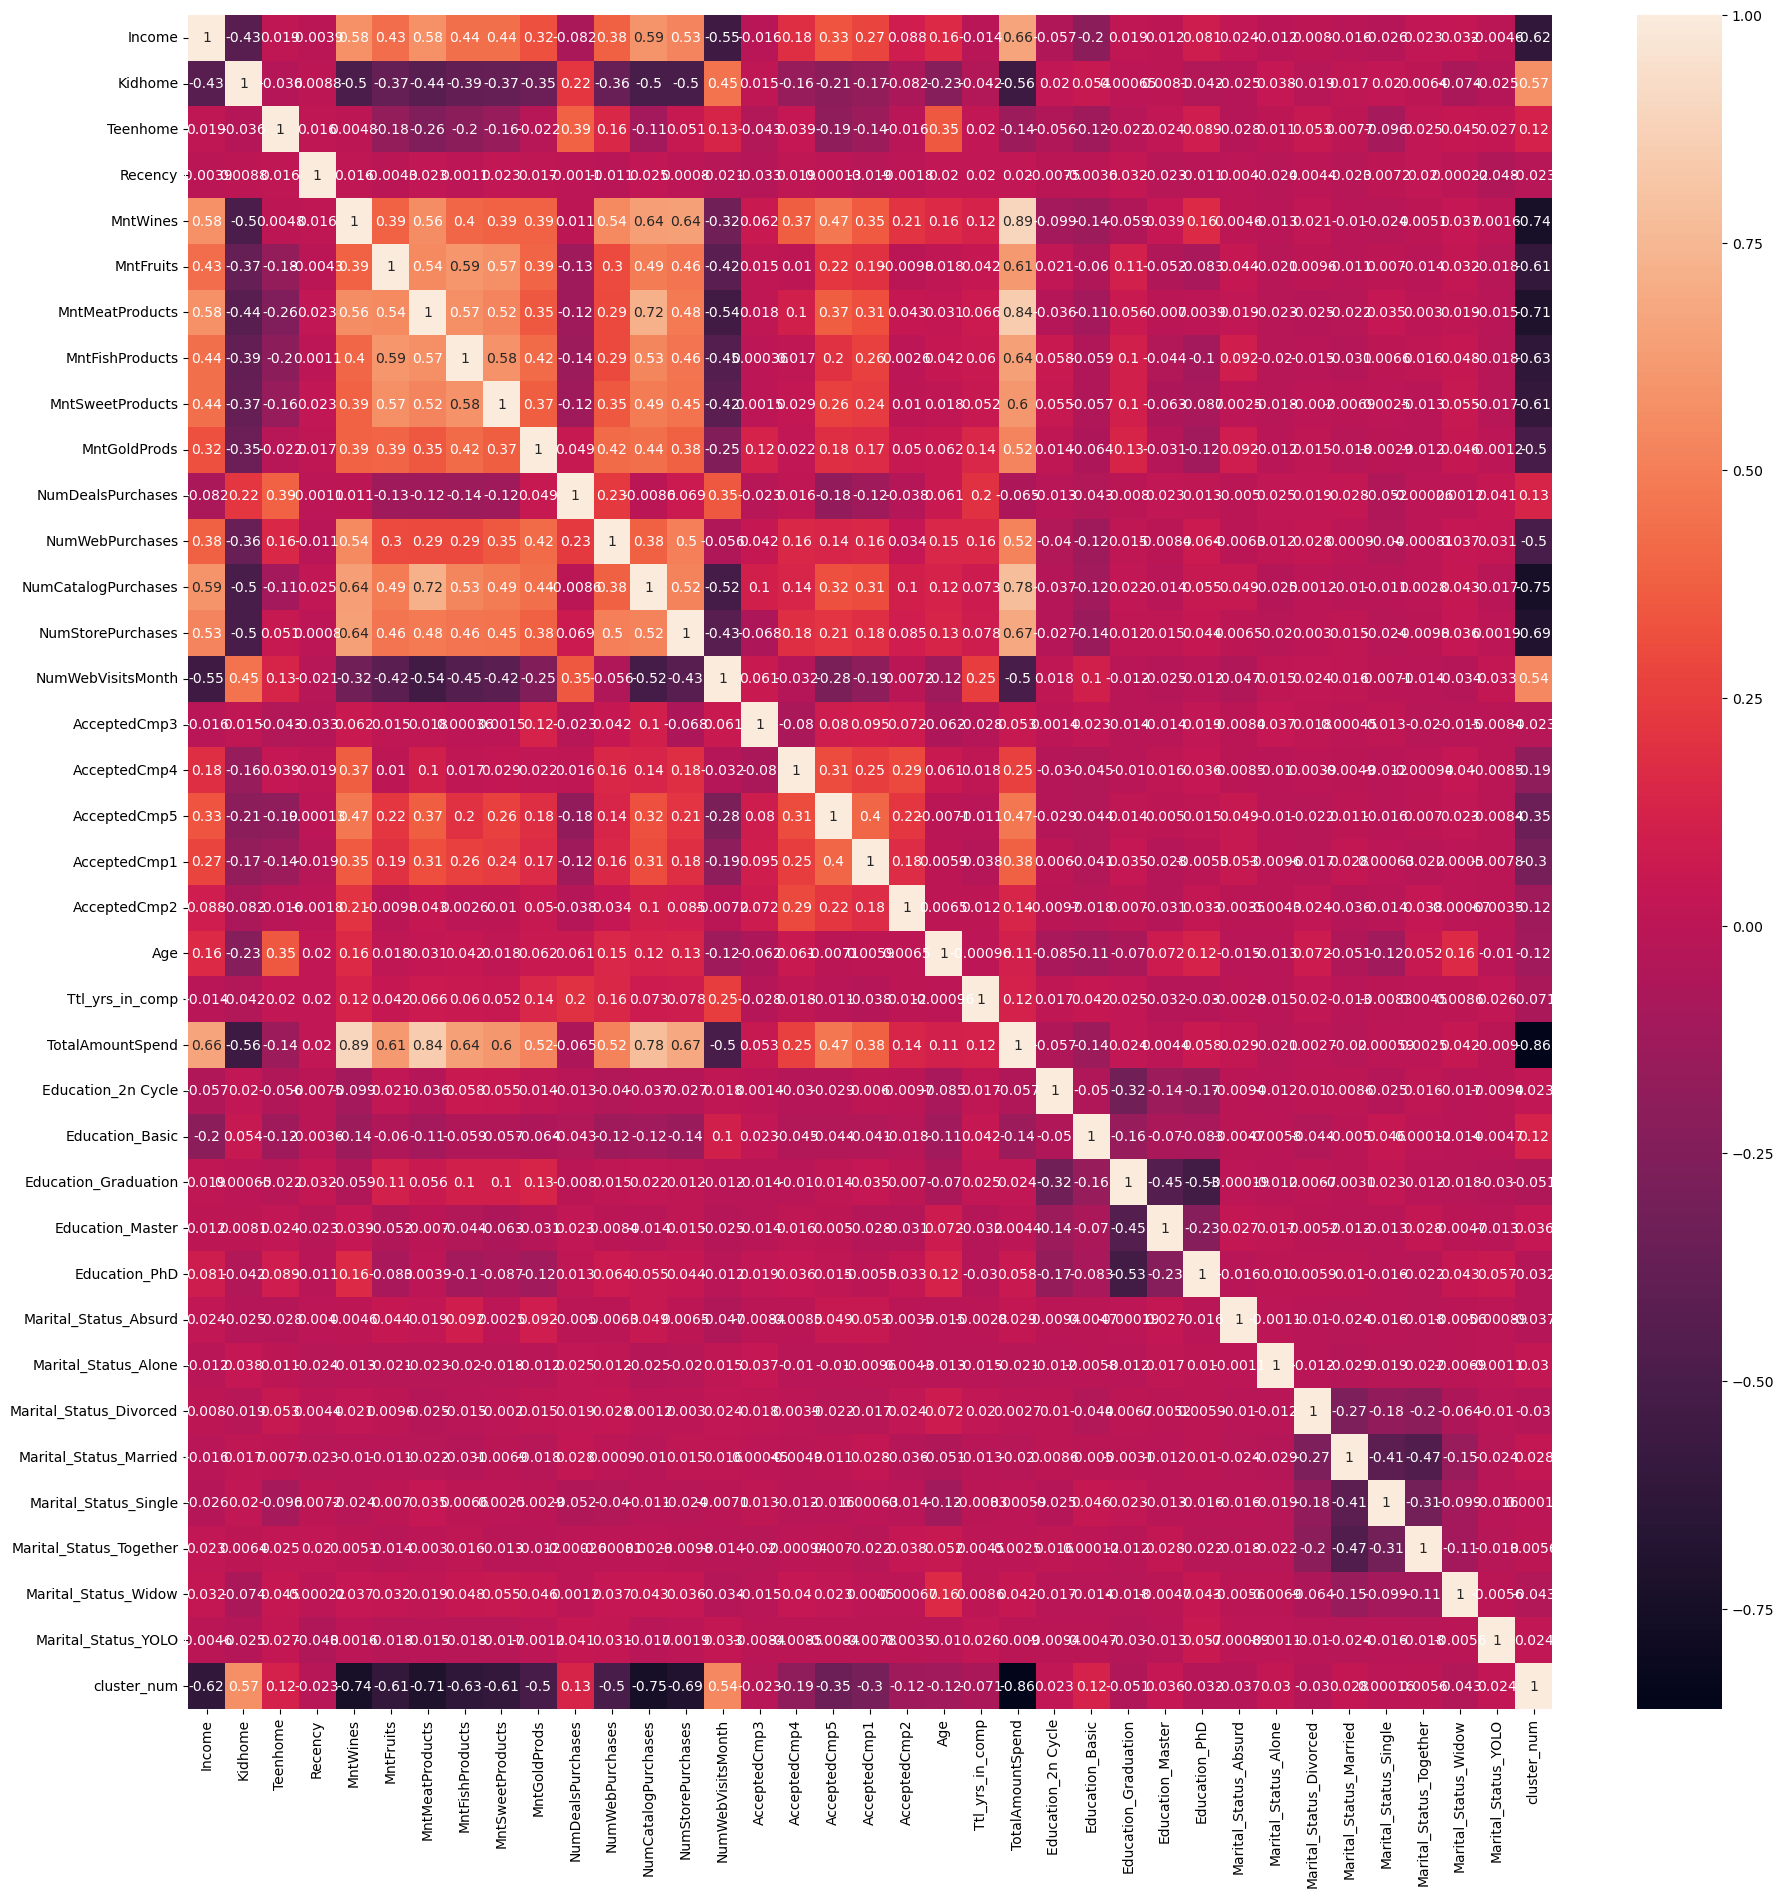

In [18]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
#Scalling the dataFrame:-
scaler=StandardScaler()
scaled_df= scaler.fit_transform(df)

In [20]:
scaled_df

array([[ 0.23532677, -0.82521765, -0.92989438, ..., -0.18867619,
        -0.02989406, -1.23505725],
       [-0.23582624,  1.03255877,  0.90693402, ..., -0.18867619,
        -0.02989406,  0.80967907],
       [ 0.77363327, -0.82521765, -0.92989438, ..., -0.18867619,
        -0.02989406, -1.23505725],
       ...,
       [ 0.18910632, -0.82521765, -0.92989438, ..., -0.18867619,
        -0.02989406, -1.23505725],
       [ 0.67903514, -0.82521765,  0.90693402, ..., -0.18867619,
        -0.02989406, -1.23505725],
       [ 0.02483795,  1.03255877,  0.90693402, ..., -0.18867619,
        -0.02989406,  0.80967907]])

In [21]:
# clustering with income and total amount speend data
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Age', 'Ttl_yrs_in_comp', 'TotalAmountSpend',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'cluster_num'],
      dtype='object')

In [22]:
X = df[['Income', 'TotalAmountSpend']].values

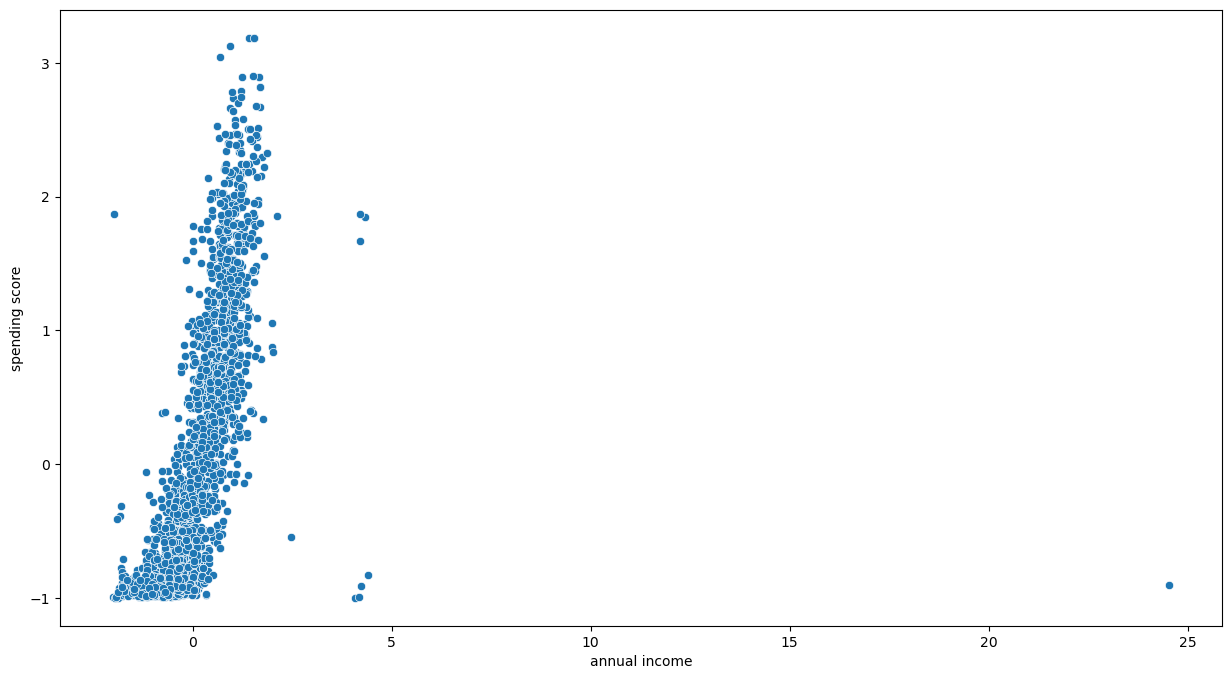

In [23]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

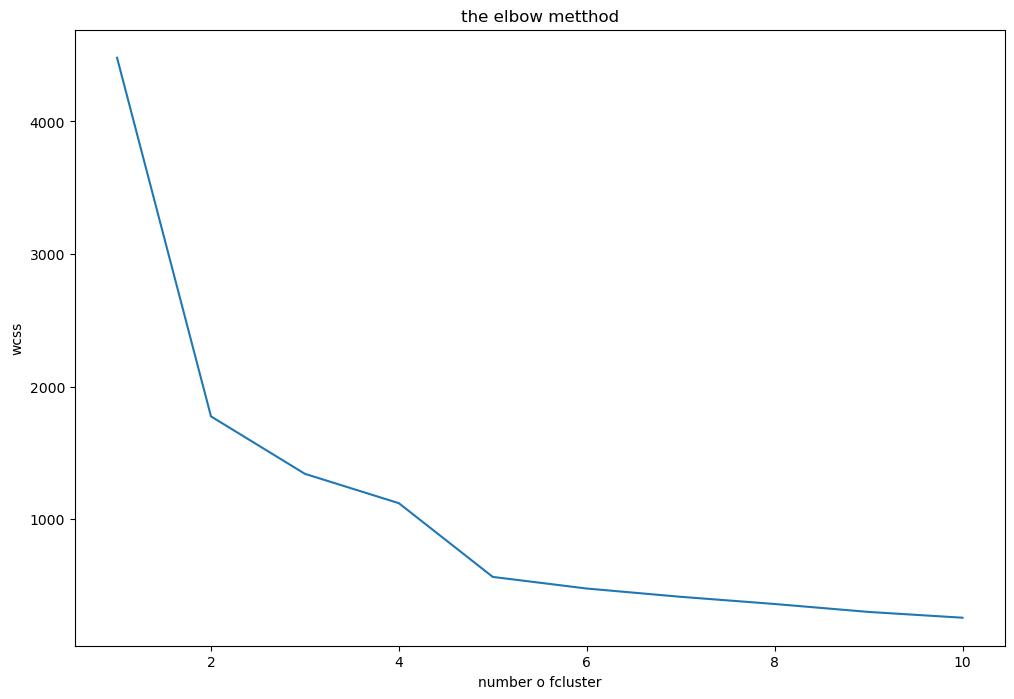

In [24]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('the elbow metthod')
plt.xlabel('number o fcluster')
plt.ylabel('wcss')
plt.show

In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

In [26]:
kmeans.cluster_centers_

array([[-0.68805811, -0.79728735],
       [ 0.45036618,  0.28070728],
       [ 1.0327123 ,  1.61273277],
       [24.54512821, -0.903147  ]])

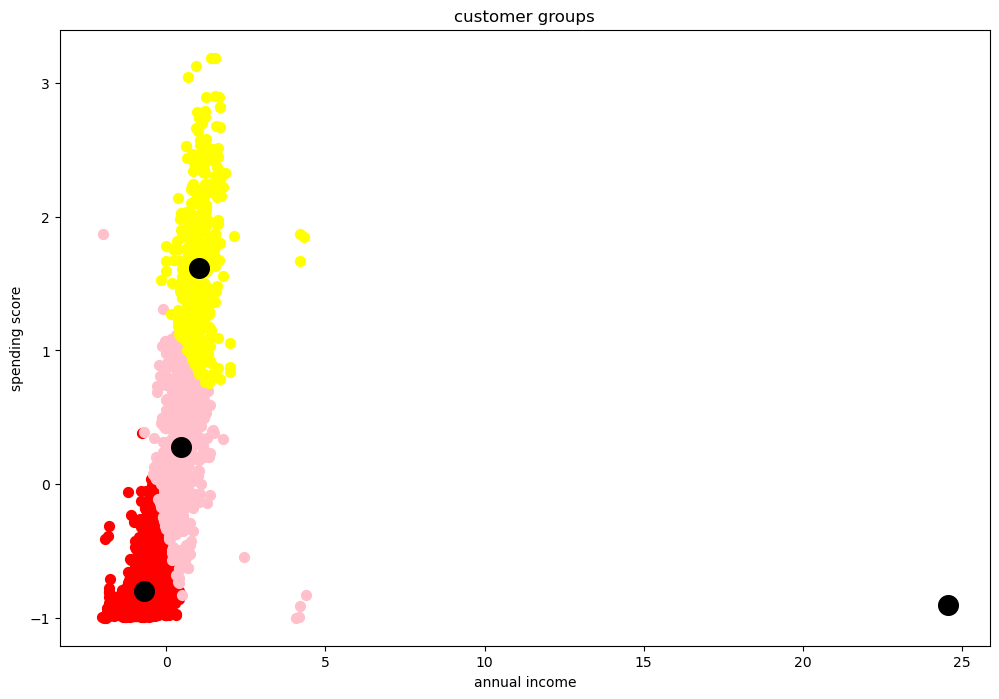

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='clusters')
plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()


In [28]:
from sklearn.cluster import KMeans
clusters = KMeans(3,random_state=0)
clusters.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

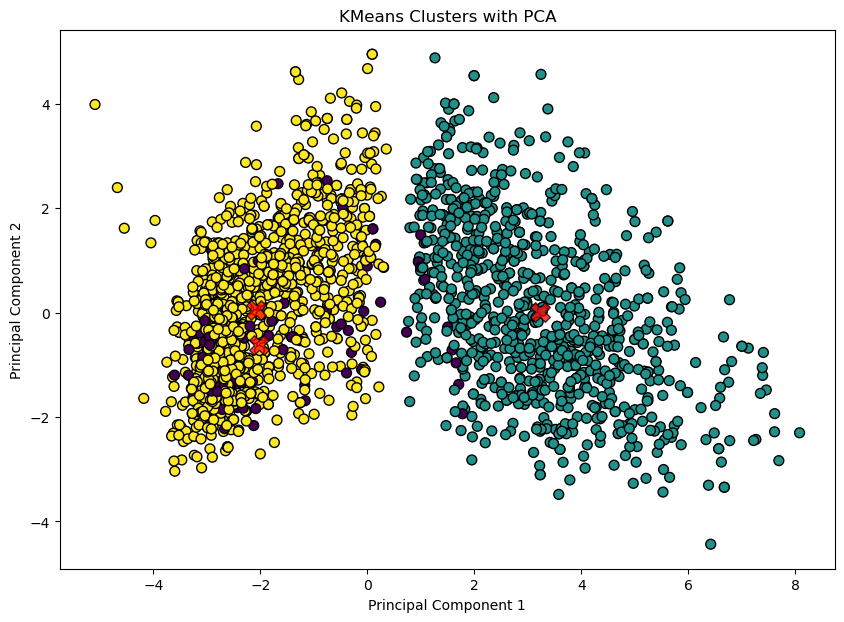

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled is already defined and scaled
# Define the number of clusters
k = 3

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Use PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Scatter plot of the two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)

# Mark the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75, edgecolor='k')

# Add titles and labels
plt.title('KMeans Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


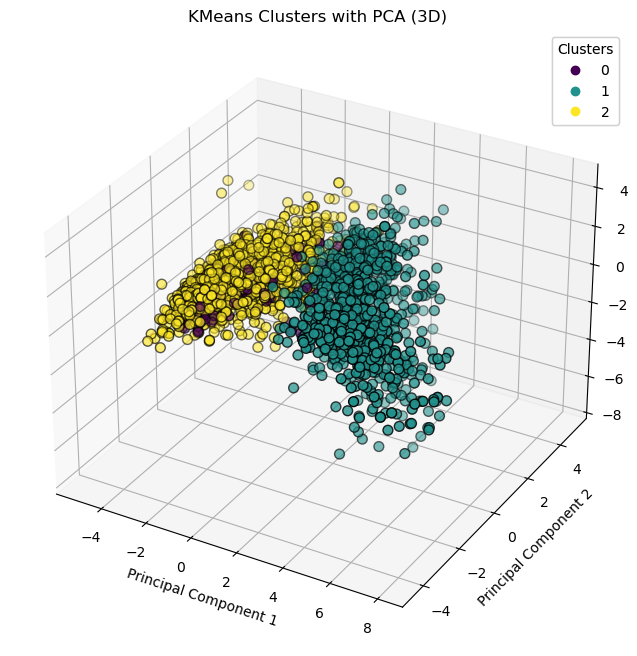

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the number of clusters
k = 3

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Use PCA to reduce dimensions to 3D
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the three principal components
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)

# Mark the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=200, alpha=0.75, edgecolor='k')

# Add titles and labels
ax.set_title('KMeans Clusters with PCA (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()

In [31]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 65930.82950004292


In [32]:
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(f'Cluster Sizes: {cluster_sizes}')

Cluster Sizes: {0: 140, 1: 878, 2: 1222}


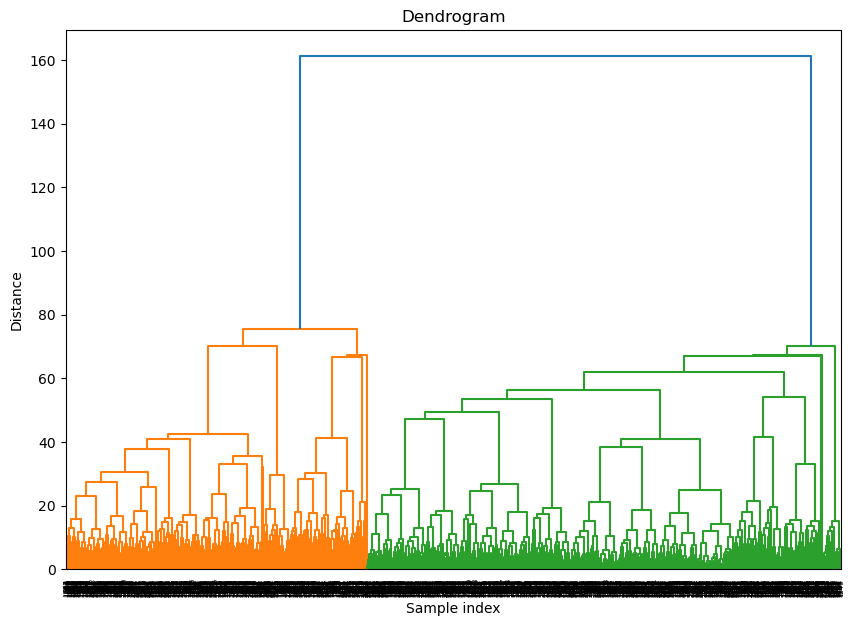

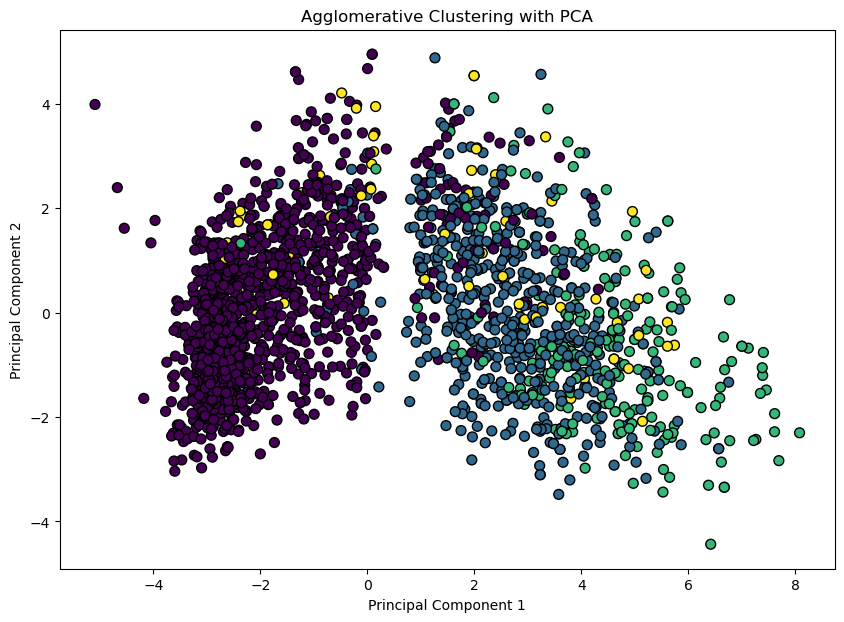

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform hierarchical clustering using the ward linkage method
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Fit the Agglomerative Clustering model
n_clusters = 4  # Choose the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(X_scaled)

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1708289129805544


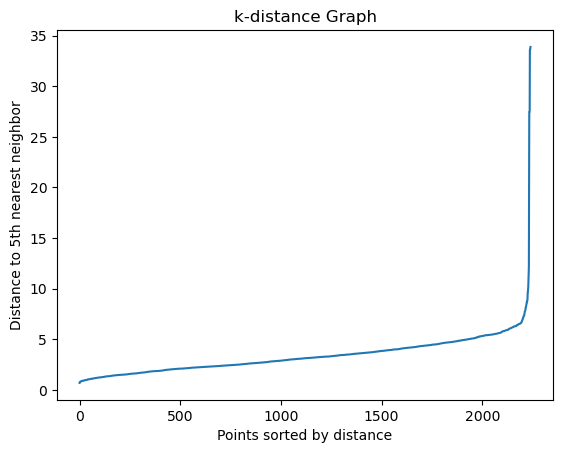

In [35]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('k-distance Graph')
plt.show()


In [37]:
df.to_csv('modified_data_clusters.csv', index=False)